In [16]:
from sklearn.datasets import fetch_openml
x, y = fetch_openml('mnist_784', data_home = './DATASET/mnist', return_x_y = True)
x.shape

TypeError: fetch_openml() got an unexpected keyword argument 'return_x_y'

AttributeError: 'str' object has no attribute 'reshape'

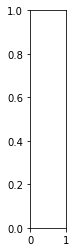

In [18]:
import matplotlib.pyplot as a
import matplotlib.cm as cm

pos = 1
for data in x [:8]:
    a.subplot(1, 8, pos)
    a.imshow(data.reshape((28, 28)),
              cmap = cm.Greys_r)
    a.axis('off')
    pos += 1
a.show()

In [19]:
y[:8]

0    5
1    0
2    4
3    1
4    9
5    2
6    1
7    3
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [20]:
# x_train = x[:60000]
# y_train = y[:60000]
# x_test = x[60000:]
# y_test = y[60000:]

x_train = x[:1000]
y_train = y[:1000]
x_test = x[69000:]
y_test = y[69000:]

In [21]:
from sklearn.svm import SVC
model = SVC(random_state = 0)
model.fit(x_train, y_train)

SVC(random_state=0)

In [22]:
from sklearn.metrics import classification_report
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       102
           1       0.97      0.99      0.98       119
           2       0.85      0.82      0.84        99
           3       0.97      0.87      0.92       102
           4       0.88      0.95      0.91        92
           5       0.91      0.86      0.88        85
           6       0.93      0.95      0.94       102
           7       0.92      0.94      0.93       115
           8       0.89      0.94      0.91        94
           9       0.92      0.84      0.88        90

    accuracy                           0.92      1000
   macro avg       0.92      0.91      0.91      1000
weighted avg       0.92      0.92      0.92      1000



In [25]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'kernel' : ['rbf', 'poly', 'sigmoid'],
    'c' : [0.5, 1, 10, 100],
    'gamma' : ['scale', 1, 0.1, 0.01, 0.001]
}
grid_search = GridSearchCV(estimator = SVC(random_state = 0),
                           param_grid = parameters,
                           n_jobs = 6,
                           verbose = 1,
                           scoring = 'accuracy')
grid_search.fit(x_train, y_train)
print(f'Best Score: {grid_search.best_score_}')

Fitting 5 folds for each of 60 candidates, totalling 300 fits


ValueError: Invalid parameter c for estimator SVC(random_state=0). Check the list of available parameters with `estimator.get_params().keys()`.

In [26]:
print(f'Best Score: {grid_search.best_score_}')
best_params = grid_search.best_estimator_.get_params()
print(f'Best Parameters:')
for param in parameters:
    print(f'\t{param}: {best_params[param]}')

AttributeError: 'GridSearchCV' object has no attribute 'best_score_'

In [27]:
y_pred = grid_search.predict(x_test)
print(classification_report(y_test, y_pred))

NotFittedError: This GridSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.